## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from keras import datasets
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPool2D,Input,Flatten,Reshape,Conv2DTranspose,UpSampling2D
import matplotlib.pyplot as plt

## Working with the dataset

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
X_train = X_train/255
X_test = X_test/255

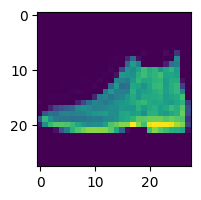

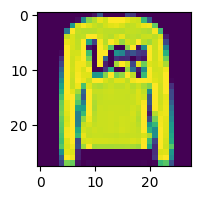

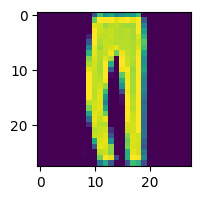

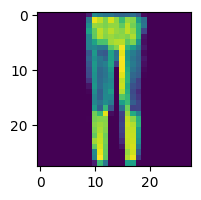

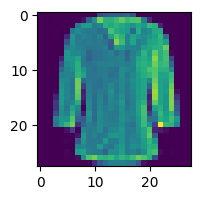

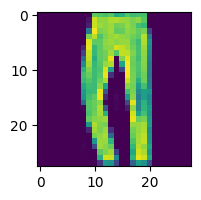

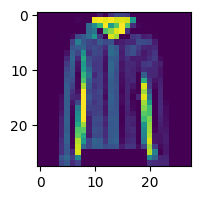

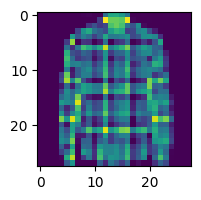

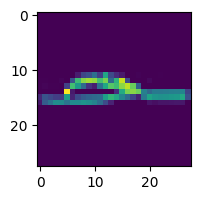

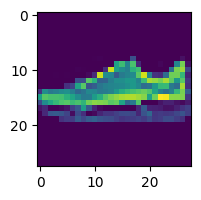

In [7]:
for i in range(10):
  plt.figure(figsize = (2,2))
  plt.imshow(X_test[i])
  plt.show()

In [8]:
X_train = np.reshape(X_train,(-1,28,28,1))

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = np.reshape(X_test,(-1,28,28,1))

In [11]:
X_test.shape

(10000, 28, 28, 1)

In [12]:
encoder = Sequential()

In [13]:
encoder.add(Input(shape = (28,28,1)))

In [14]:
encoder.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))
encoder.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))

In [15]:
encoder.add(MaxPool2D(pool_size = (2,2)))

In [16]:
encoder.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding='same'))
encoder.add(MaxPool2D(pool_size = (2,2)))

In [17]:
encoder.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))

In [18]:
encoder.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))

In [19]:
encoder.add(Flatten())

In [20]:
encoder.add(Dense(units = 128,activation = 'relu'))

In [21]:
encoder.add(Dense(units = 2))

In [22]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 32)          9

In [23]:
decoder = Sequential()

In [24]:
decoder.add(Input(shape = (2,)))

In [25]:
decoder.add(Dense(units = 128,activation = 'relu'))

In [26]:
decoder.add(Dense(units = 2048,activation = 'relu'))

In [27]:
decoder.add(Reshape((4,4,128)))

In [28]:
decoder.add(Conv2DTranspose(filters = 32,kernel_size = (3,3),padding = 'same',activation = 'relu'))

In [29]:
decoder.add(Conv2DTranspose(filters = 32,kernel_size = (3,3),activation = 'relu'))

In [30]:
decoder.add(UpSampling2D(size = (2,2)))

In [31]:
decoder.add(Conv2DTranspose(filters = 32,kernel_size = (3,3),activation = 'relu',padding = 'same'))

In [32]:
decoder.add(UpSampling2D(size = (2,2)))

In [33]:
decoder.add(Conv2DTranspose(filters = 32,kernel_size = (3,3),activation = 'relu'))
decoder.add(Conv2DTranspose(filters = 32,kernel_size = (3,3),activation = 'relu'))

In [34]:
decoder.add(Conv2D(filters = 1,kernel_size = (3,3),padding = 'same',activation = 'relu'))

In [35]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 2048)              264192    
                                                                 
 reshape (Reshape)           (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 4, 4, 32)          36896     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 6, 6, 32)          9248      
 Transpose)                                                      
                                                                 
 up_sampling2d (UpSampling2  (None, 12, 12, 32)       

In [36]:
input_ae = encoder.inputs
output_e = encoder.outputs
output_de = decoder(output_e)
output_de

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'sequential_1')>

In [37]:
autoencoder = Model(inputs = input_ae,outputs = output_de)

In [38]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                        

In [39]:
autoencoder.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [45]:
autoencoder.fit(X_train,X_train,epochs = 10,batch_size = 32,validation_data = (X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3526 - accuracy: 0.4967 - val_loss: 0.3456 - val_accuracy: 0.4932
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3554 - accuracy: 0.4968 - val_loss: 0.3386 - val_accuracy: 0.4958
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3665 - accuracy: 0.4963 - val_loss: 0.3501 - val_accuracy: 0.4929
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3492 - accuracy: 0.4974 - val_loss: 0.3405 - val_accuracy: 0.4959
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3374 - accuracy: 0.4982 - val_loss: 0.3487 - val_accuracy: 0.4960
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3352 - accuracy: 0.4984 - val_loss: 0.3334 - val_accuracy: 0.4965
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3353 - accuracy: 0.4986 - val_loss: 0.3344 - val_ac

In [46]:
pred = autoencoder.predict(X_test[:100])

4/4 [==============================] - 0s 7ms/step


In [47]:
pred.shape

(100, 28, 28, 1)

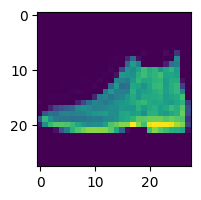

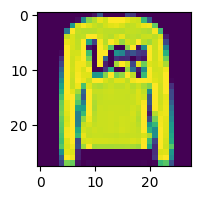

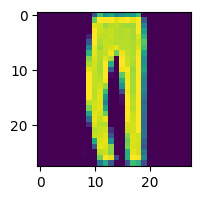

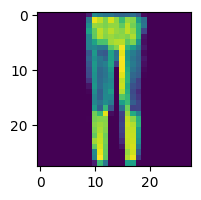

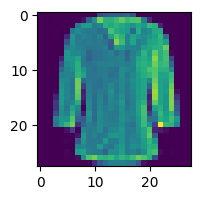

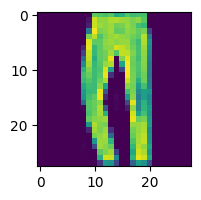

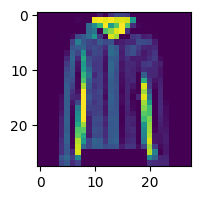

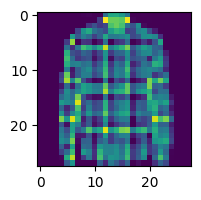

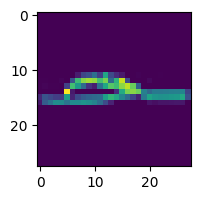

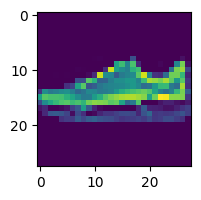

In [48]:
for i in range(10):
  plt.figure(figsize = (2,2))
  plt.imshow(X_test[i])
  plt.show()

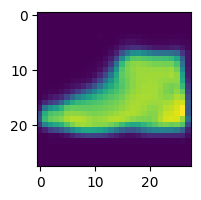

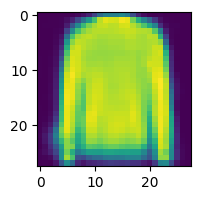

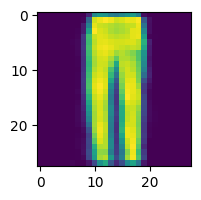

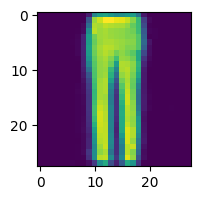

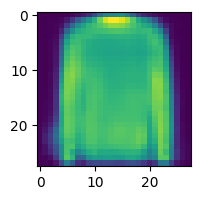

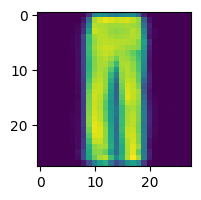

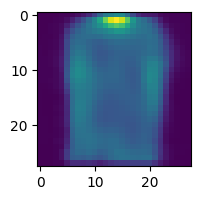

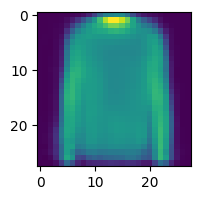

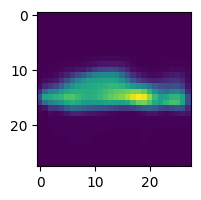

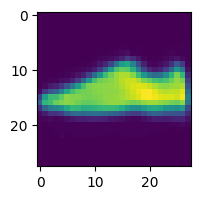

In [49]:
for i in range(10):
  plt.figure(figsize = (2,2))
  plt.imshow(pred[i])
  plt.show()

In [50]:
embeddings = encoder.predict(X_test[:1000])
embeddings

32/32 [==============================] - 0s 9ms/step


array([[-0.12657496, -0.9486624 ],
       [-2.4896343 ,  0.07476779],
       [-0.42933282,  1.6681627 ],
       ...,
       [-2.2875898 , -0.38077682],
       [-0.04453599, -0.28822944],
       [-0.15768975, -0.5696596 ]], dtype=float32)

In [51]:
embeddings.shape

(1000, 2)

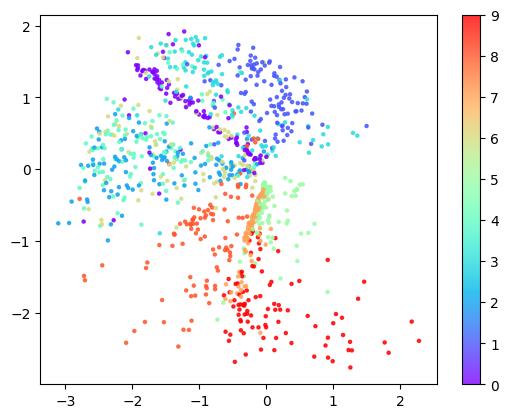

In [52]:
labels = y_test[:1000]
plt.scatter(embeddings[:,0],embeddings[:,1],c = labels,cmap = 'rainbow',alpha = 0.8,s = 5)
plt.colorbar()
plt.show()

In [56]:
mins,maxs = np.min(embeddings,axis=0),np.max(embeddings,axis = 0)

In [57]:
mins

array([-3.106922 , -2.7645876], dtype=float32)

In [58]:
maxs

array([2.278305, 1.919047], dtype=float32)

In [93]:
# Get the range of the existing embeddings
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)
EMBEDDING_DIM = 2
# Sample some points in the latent space
grid_width, grid_height = (6, 3)
sample = np.random.normal(mins, maxs, size=(grid_width * grid_height, EMBEDDING_DIM))

In [94]:
sample

array([[-3.00067502, -2.32191739],
       [-6.62069134, -1.51619431],
       [-3.52897247, -4.36507624],
       [-5.54551504, -3.65413707],
       [-1.03628447, -5.14689168],
       [-3.38735122, -4.17830086],
       [-3.51041564, -3.99884794],
       [-6.36703523, -5.64613006],
       [-0.33157493, -2.97252571],
       [-0.78864256, -2.51341989],
       [-3.72417849, -0.79956014],
       [-3.97318408, -1.94840373],
       [ 2.45427335,  1.39914747],
       [-1.53525344, -2.99698955],
       [-1.84129112, -1.4741759 ],
       [-1.66421224, -0.95609978],
       [-2.88247833, -0.57385296],
       [-2.70792306,  0.42730023]])

In [95]:
sample.shape

(18, 2)

In [96]:
reconstruction = decoder.predict(sample)

1/1 [==============================] - 0s 18ms/step


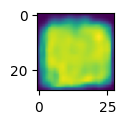

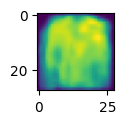

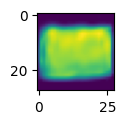

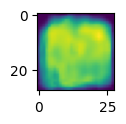

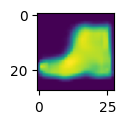

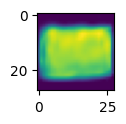

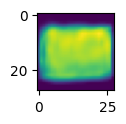

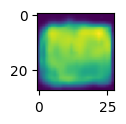

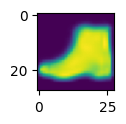

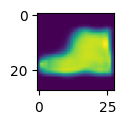

In [97]:
for i in range(10):
  plt.figure(figsize = (1,1))
  plt.imshow(reconstruction[i])
  plt.show()

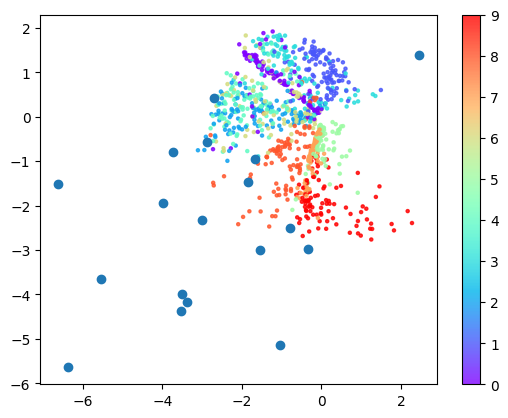

In [102]:
labels = y_test[:1000]
plt.scatter(embeddings[:,0],embeddings[:,1],c = labels,cmap = 'rainbow',alpha = 0.8,s = 5)
plt.colorbar()
plt.scatter(sample[:,0],sample[:,1])
plt.show()

In [99]:
test_point = np.array([(2*mins+3*maxs)/2])
test_point

array([[0.31053567, 0.11398292]], dtype=float32)

In [100]:
pred = decoder.predict(test_point)
pred.shape

1/1 [==============================] - 0s 18ms/step


(1, 28, 28, 1)

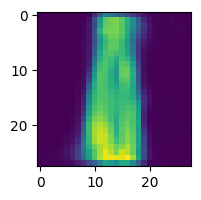

In [101]:
plt.figure(figsize = (2,2))
plt.imshow(pred[0])